# Machine Learning Projects

# Project 1

## 1. Linear regression - Predicting House Prices

In [2]:
# Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import data into a pandas dataframe
house_df = pd.read_csv('AmesHousing.csv')
house_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
# Checking the columns in the dataset
house_df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [5]:
# Select columns to use
cols = [
    'Lot Area',  'Neighborhood', 'Bldg Type', 'Overall Qual', 'Year Built', 'Exter Qual', 'Foundation', 'Bsmt Qual',
    'Bsmt Full Bath', 'Full Bath', 'Bedroom AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Pool Area', 'Fence',  'Sale Type', 
    'Sale Condition', 'SalePrice'
]
# Create a new dataset with the selected columns
new_house_df = house_df[cols]
new_house_df.head()

,Lot Area,Neighborhood,Bldg Type,Overall Qual,Year Built,Exter Qual,Foundation,Bsmt Qual,Bsmt Full Bath,Full Bath,Bedroom AbvGr,Kitchen Qual,TotRms AbvGrd,Pool Area,Fence,Sale Type,Sale Condition,SalePrice
0,31770,NAmes,1Fam,6,1960,TA,CBlock,TA,1.0,1,3,TA,7,0,NaN,WD,Normal,215000
1,11622,NAmes,1Fam,5,1961,TA,CBlock,TA,0.0,1,2,TA,5,0,MnPrv,WD,Normal,105000
2,14267,NAmes,1Fam,6,1958,TA,CBlock,TA,0.0,1,3,Gd,6,0,NaN,WD,Normal,172000
3,11160,NAmes,1Fam,7,1968,Gd,CBlock,TA,1.0,2,3,Ex,8,0,NaN,WD,Normal,244000
4,13830,Gilbert,1Fam,5,1997,TA,PConc,Gd,0.0,2,3,TA,6,0,MnPrv,WD,Normal,189900


### Data Exploration and Cleaning

In [7]:
# Show the info of the new data set
new_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   int64  
 1   Neighborhood    2930 non-null   object 
 2   Bldg Type       2930 non-null   object 
 3   Overall Qual    2930 non-null   int64  
 4   Year Built      2930 non-null   int64  
 5   Exter Qual      2930 non-null   object 
 6   Foundation      2930 non-null   object 
 7   Bsmt Qual       2850 non-null   object 
 8   Bsmt Full Bath  2928 non-null   float64
 9   Full Bath       2930 non-null   int64  
 10  Bedroom AbvGr   2930 non-null   int64  
 11  Kitchen Qual    2930 non-null   object 
 12  TotRms AbvGrd   2930 non-null   int64  
 13  Pool Area       2930 non-null   int64  
 14  Fence           572 non-null    object 
 15  Sale Type       2930 non-null   object 
 16  Sale Condition  2930 non-null   object 
 17  SalePrice       2930 non-null   i

In [8]:
# chech for missing values
new_house_df.isna().sum()

Lot Area             0
Neighborhood         0
Bldg Type            0
Overall Qual         0
Year Built           0
Exter Qual           0
Foundation           0
Bsmt Qual           80
Bsmt Full Bath       2
Full Bath            0
Bedroom AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Pool Area            0
Fence             2358
Sale Type            0
Sale Condition       0
SalePrice            0
dtype: int64

In [9]:
# Fence has so many missing values, drop it
new_house_df.drop(columns = 'Fence', axis = 1, inplace = True)

# Bsmt Qual has 80 missing values, replace with the mean
new_house_df['Bsmt Qual'] = new_house_df['Bsmt Qual'].fillna(new_house_df['Bsmt Qual'].mode()[0])

# Bsmt Full Bath has 2 missing values , replace with the mean
new_house_df['Bsmt Full Bath'] = new_house_df['Bsmt Full Bath'].fillna(new_house_df['Bsmt Full Bath'].mean())

# Check for the changes made
new_house_df.isna().sum()

Lot Area          0
Neighborhood      0
Bldg Type         0
Overall Qual      0
Year Built        0
Exter Qual        0
Foundation        0
Bsmt Qual         0
Bsmt Full Bath    0
Full Bath         0
Bedroom AbvGr     0
Kitchen Qual      0
TotRms AbvGrd     0
Pool Area         0
Sale Type         0
Sale Condition    0
SalePrice         0
dtype: int64

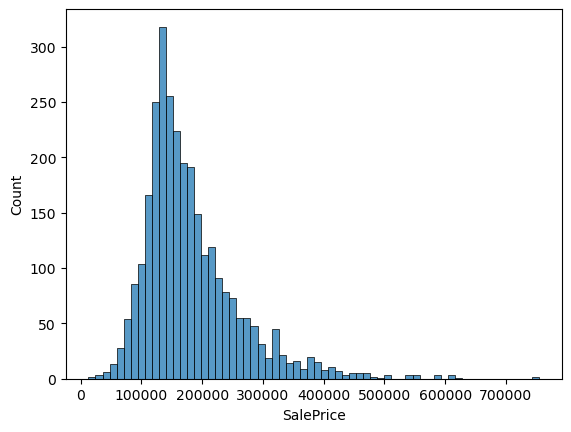

In [10]:
# Check the distribution of sale price
sns.histplot(
    new_house_df['SalePrice']
);

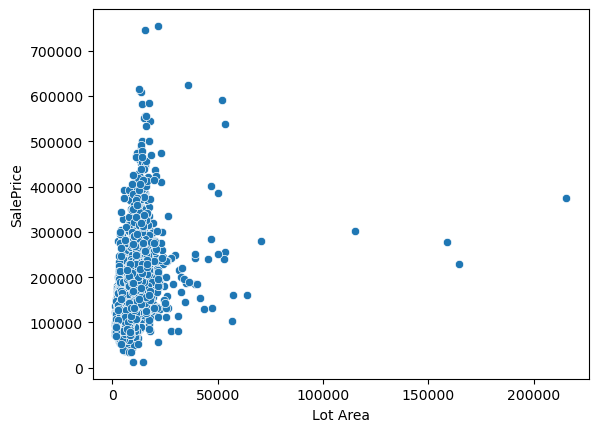

In [11]:
# Check relationship between sale price and lot area
sns.scatterplot(
    x = 'Lot Area', 
    y = 'SalePrice', 
    data = new_house_df
);

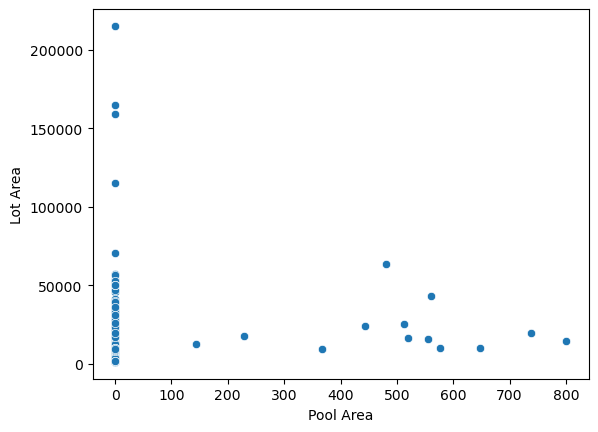

In [12]:
# Check the relations hip between poll area and lot Area
sns.scatterplot(
    x = 'Pool Area', 
    y = 'Lot Area', 
    data = new_house_df
);

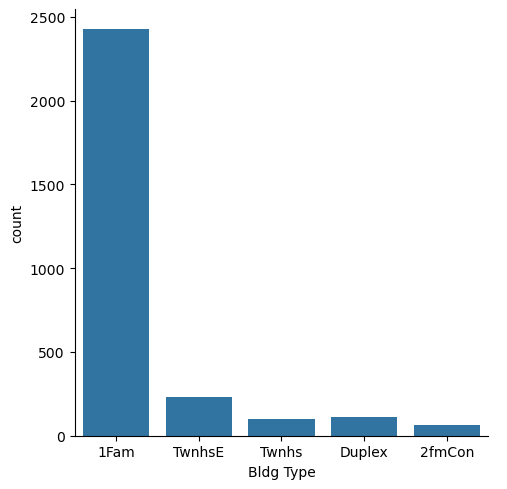

In [13]:
# Count plot building type
sns.catplot(
    x = 'Bldg Type',
    data = new_house_df,
    kind = 'count'
);

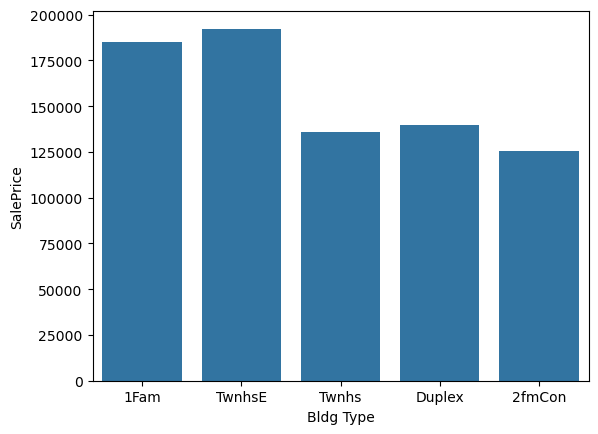

In [14]:
# Bar chart of building type and sale price
sns.barplot(
    data = new_house_df,
    x = 'Bldg Type',
    y = 'SalePrice',
    ci = None
);

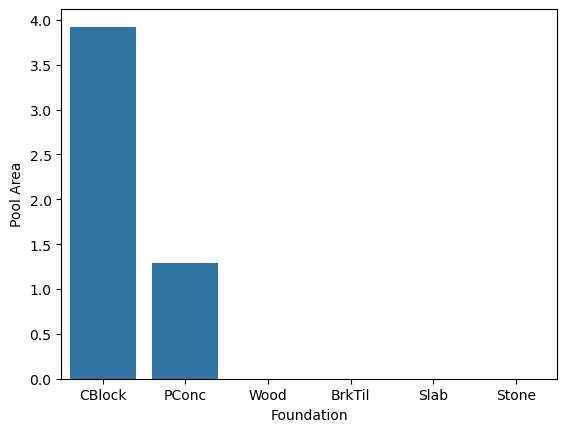

In [15]:
# Bar chart of foundation and pool area
sns.barplot(
    data = new_house_df,
    x = 'Foundation',
    y = 'Pool Area',
    ci = None
);

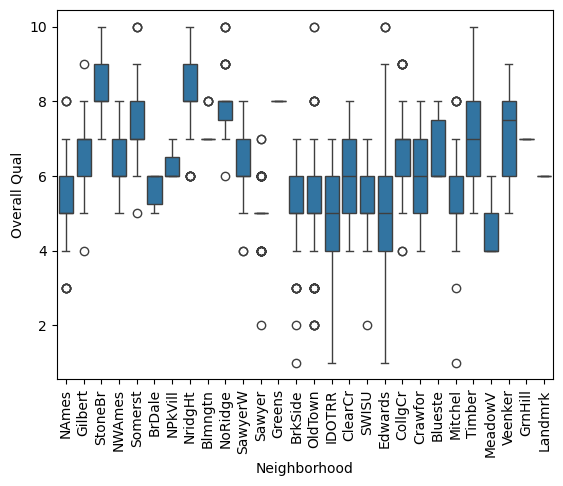

In [16]:
# Check the distribution of overall quality vs neighborhood
sns.boxplot(
    data = new_house_df,
    x = 'Neighborhood',
    y = 'Overall Qual'
)
plt.xticks(rotation = 90)
plt.show();

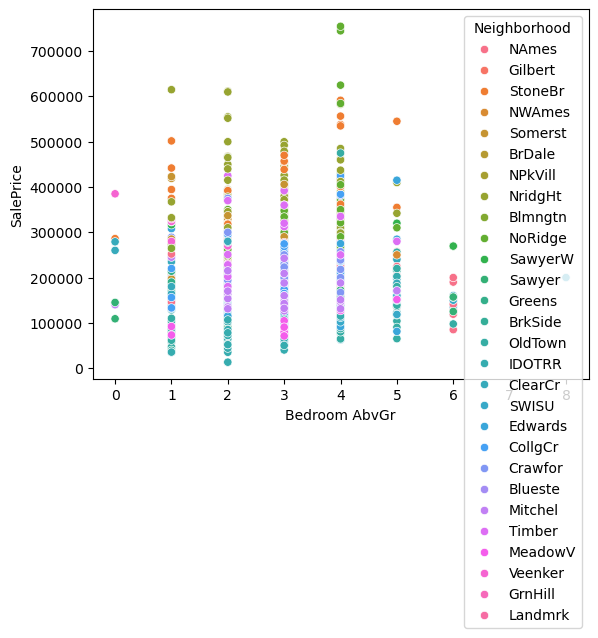

In [17]:
# Check the relationship sale price and bedroom abvGr colored by neighborhood
sns.scatterplot(
    x = 'Bedroom AbvGr', 
    y = 'SalePrice', 
    hue = 'Neighborhood',
    data = new_house_df
);

In [18]:
# Create a variable to store all categorical columns
categorical_columns = new_house_df.select_dtypes(['object']).columns
categorical_columns

Index(['Neighborhood', 'Bldg Type', 'Exter Qual', 'Foundation', 'Bsmt Qual',
       'Kitchen Qual', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [19]:
# Create an instance of label encoder
le = LabelEncoder()

# Create a function to convert the categorical coulns into numerical
for col in categorical_columns:
    new_house_df[col] = le.fit_transform(new_house_df[col])

new_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   int64  
 1   Neighborhood    2930 non-null   int32  
 2   Bldg Type       2930 non-null   int32  
 3   Overall Qual    2930 non-null   int64  
 4   Year Built      2930 non-null   int64  
 5   Exter Qual      2930 non-null   int32  
 6   Foundation      2930 non-null   int32  
 7   Bsmt Qual       2930 non-null   int32  
 8   Bsmt Full Bath  2930 non-null   float64
 9   Full Bath       2930 non-null   int64  
 10  Bedroom AbvGr   2930 non-null   int64  
 11  Kitchen Qual    2930 non-null   int32  
 12  TotRms AbvGrd   2930 non-null   int64  
 13  Pool Area       2930 non-null   int64  
 14  Sale Type       2930 non-null   int32  
 15  Sale Condition  2930 non-null   int32  
 16  SalePrice       2930 non-null   int64  
dtypes: float64(1), int32(8), int64(8)

In [20]:
# Split the data into target and feature variables
target = new_house_df['SalePrice']
print(target.head())
features = new_house_df.drop('SalePrice', axis = 'columns')
features.head()

0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64


,Lot Area,Neighborhood,Bldg Type,Overall Qual,Year Built,Exter Qual,Foundation,Bsmt Qual,Bsmt Full Bath,Full Bath,Bedroom AbvGr,Kitchen Qual,TotRms AbvGrd,Pool Area,Sale Type,Sale Condition
0,31770,15,0,6,1960,3,1,4,1.0,1,3,4,7,0,9,4
1,11622,15,0,5,1961,3,1,4,0.0,1,2,4,5,0,9,4
2,14267,15,0,6,1958,3,1,4,0.0,1,3,2,6,0,9,4
3,11160,15,0,7,1968,2,1,4,1.0,2,3,0,8,0,9,4
4,13830,8,0,5,1997,3,2,2,0.0,2,3,4,6,0,9,4


In [21]:
# Split the target and features variable into train sets and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 1)

# Check the shapes of the splitted datasets
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is:", y_test.shape)

The shape of X_train is: (2344, 16)
The shape of X_test is: (586, 16)
The shape of y_train is: (2344,)
The shape of y_test is: (586,)


In [22]:
# Create an instance of linear regression
lr = LinearRegression()

In [23]:
# fit the train data into the model
lr_model = lr.fit(X_train, y_train)

In [24]:
# Predict our target data
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([114820.11648615, 193909.08383432, 196888.75834569, 218046.63306799,
       177926.18549476, 128949.10822643, 220447.05692988, 136453.97391518,
       112033.21264499, 111666.6811279 , 172766.53684422, 144421.998166  ,
       159943.85949195,  84944.95372828, 191766.92399921, 271875.04568301,
        70575.6873329 , 167247.84275376,  92663.70389014, 229569.98044294,
       115978.55290067, 217155.5540929 , 204542.19344043, 165946.08821129,
        92375.18027865,  81312.47281534, 132772.00128454, 286631.48390663,
       148579.01682866, 247181.570365  , 126720.57693251, 218691.39105819,
       126591.55814569, 369501.0048179 , 160349.04262219, 283302.65959763,
       171408.29749685, 117207.57044991, 145196.99710199, 236306.89497665,
        49662.10236493, 195476.27053131, 262172.97834792, 260745.28131683,
        94104.48268522, 286151.51812525, 160570.84418325, 288290.55235151,
       224859.87934617, 157694.42183369, 171930.90831713, 124791.94442436,
        96803.24263851, 1

In [25]:
# Evaluate the performance of our model
round(mean_squared_error(y_test, y_pred_lr))

1137410703

# Machine Learning Projects

# Project 2

## 2: Logistic Regression - Predicting Admission to a University

In [27]:
# Import data into a pandas dataframe
admission_df = pd.read_csv('Admission_Predict_Ver1.1.csv')
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Data Exploration and Cleaning

In [29]:
# Show the info of the data set
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [30]:
# chech for missing values
admission_df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

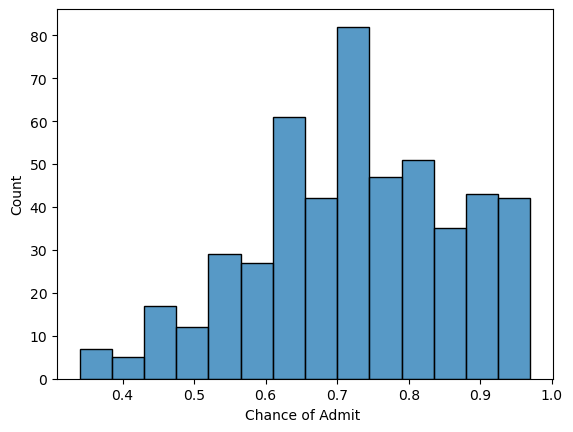

In [31]:
# Check the distribution of Chance of Admit
sns.histplot(
    admission_df['Chance of Admit ']
);

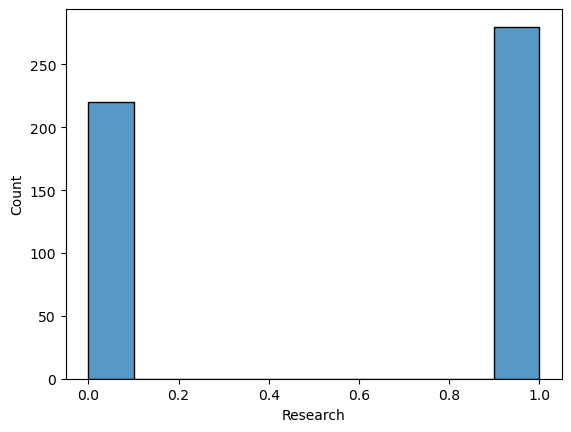

In [32]:
# Check the distribution of research
sns.histplot(
    admission_df['Research']
);

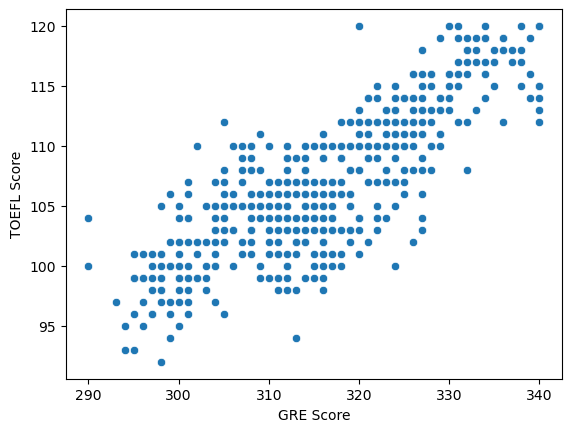

In [33]:
# Check relationship between GRE Score and TOEFL Score
sns.scatterplot(
    x = 'GRE Score', 
    y = 'TOEFL Score', 
    data = admission_df
);

In [34]:
admission_df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

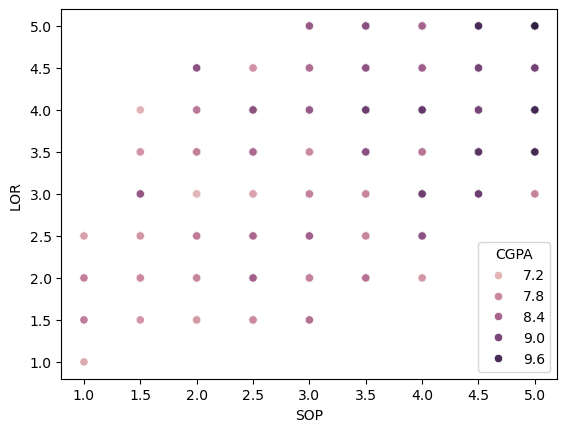

In [35]:
# Check the relationship SOP and LOR colored by CGPA
sns.scatterplot(
    x = 'SOP', 
    y = 'LOR ', 
    hue = 'CGPA',
    data = admission_df
);

In [36]:
# The column 'Chance of Admit' and 'LOR' have white spaces at the end, remove them

admission_df.columns = admission_df.columns.str.strip()
admission_df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [37]:
# Drop the 'Serial No.' column
admission_df.drop(columns = 'Serial No.', axis = 1, inplace = True)
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [38]:
# Convert the 'Chance of Admit' from float into number
admission_df['Chance of Admit'] = admission_df['Chance of Admit'].round()
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [39]:
# Split the data into response and independent variables
response = admission_df['Chance of Admit']
print(response.head())
independent = admission_df.drop(columns = 'Chance of Admit', axis = 1)
independent.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Chance of Admit, dtype: float64


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [40]:
# Split the target and features variable into train sets and test sets
X_train, X_test, y_train, y_test = train_test_split(independent, response, test_size = 0.2, random_state = 1)
# Check the shapes of the splitted data sets
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of y_train is:", y_test.shape)

The shape of X_train is: (400, 7)
The shape of X_test is: (100, 7)
The shape of y_train is: (400,)
The shape of y_train is: (100,)


In [41]:
# Create an instance of logistic regression
log_reg = LogisticRegression()

In [42]:
# Fit the train data sets into the model
model_log_reg = log_reg.fit(X_train, y_train)

In [43]:
# Predict the chance of admission
y_pred_log_reg = model_log_reg.predict(X_test)
y_pred_log_reg

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [44]:
# Evaluate the accuracy of the model
accuracy_score(y_test, y_pred_log_reg)

0.94